In [1]:
import numpy as np
import pandas as pd 

In [2]:
# getting the dataframe.
df=pd.read_csv(r"C:\Users\Almog\kc_house_data.csv") 
# the quiestion is: Can you predict the home price based on its other features?

In [3]:
# showing the first 10 (0-9) rows.
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
# dropping the id and date columns.
df = df.drop(['id', 'date'],axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# checking the empty spots. 
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# setting up y label.
y = df[['price']]
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [7]:
# setting up x label, aka the features.
X = df.drop(['price'],axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# getting my x and y train and test.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X ,y ,random_state=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170DEFB0518>,
      dtype=object)

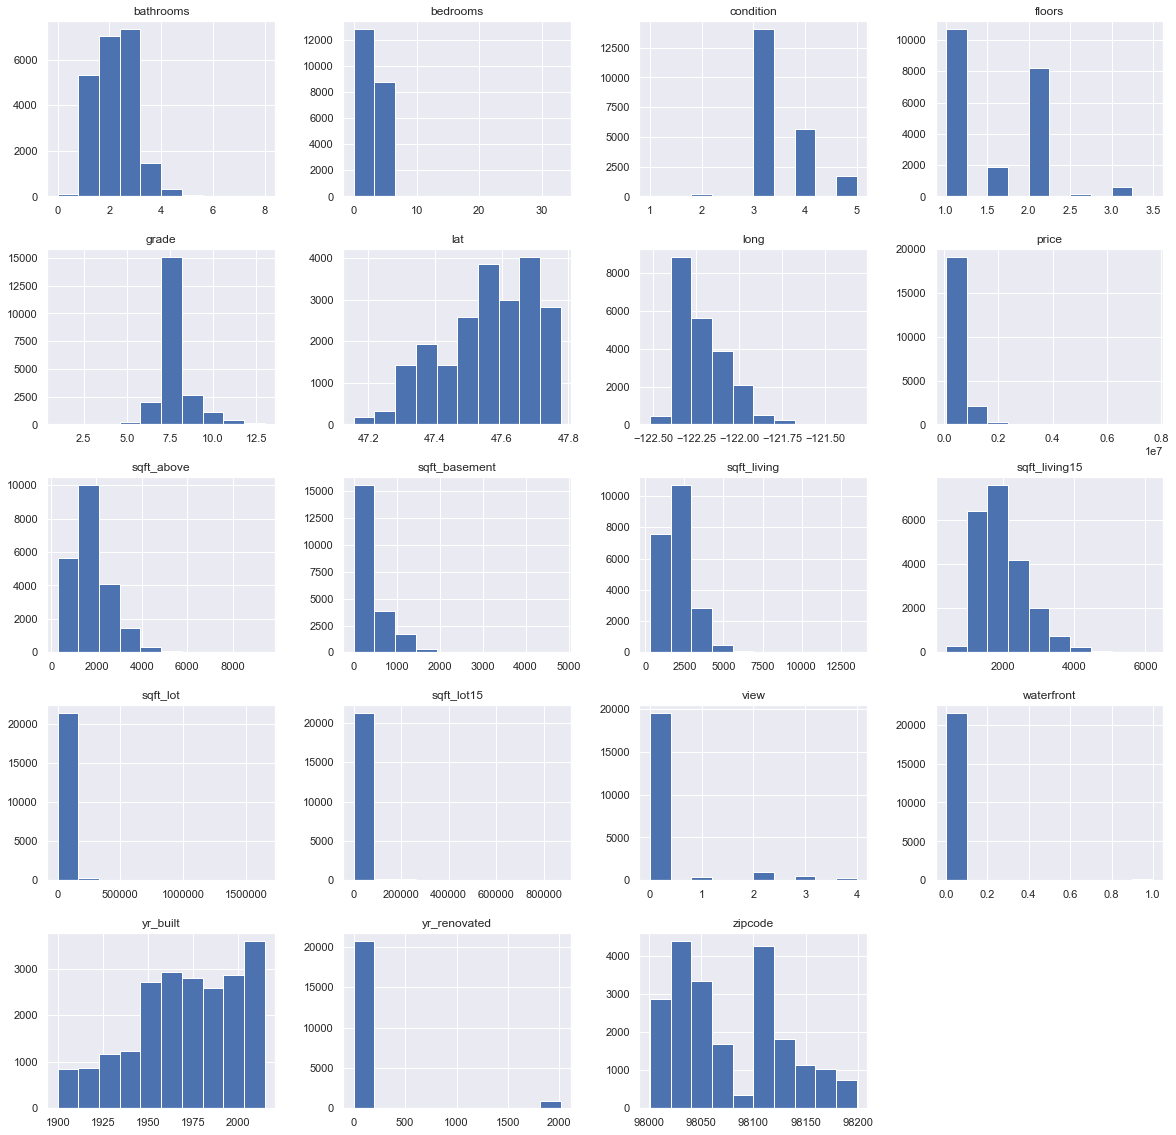

In [29]:
#looking at where most of the data are in each in our features.
df.hist(figsize = (20,20))

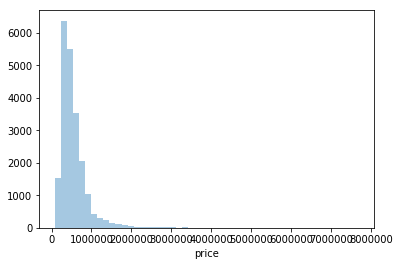

In [10]:
#looking only at the y label
import seaborn as sns
sns.distplot(df['price'], bins=50, kde=False)
#from the histogram we can understand that the price has appreciable positive skewness, deviates from the normal distribution 
#and shows peakedness.

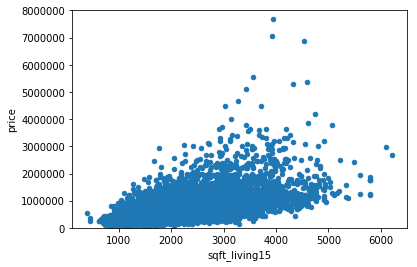

In [11]:
#looking at the "sqft_living15" feature(square foot living area).
var = 'sqft_living15'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,8000000))
#we can understand that there's a linear relationship with a significant part of outliers.

(-0.5, 12.5, 0, 3500000)

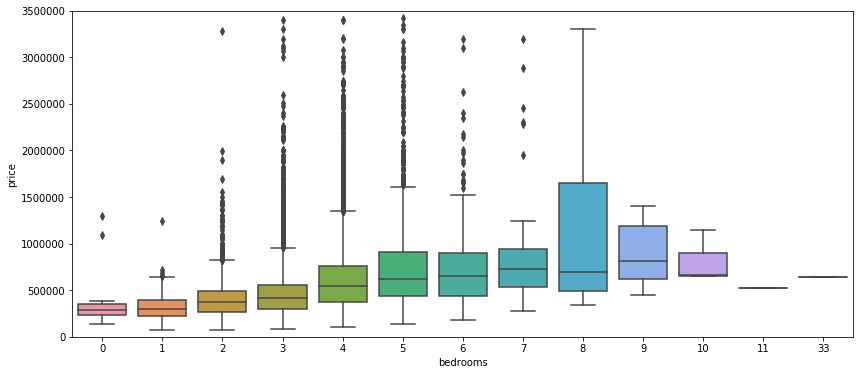

In [12]:
#looking at the "bedrooms","grade" and "bathrooms" features.
import matplotlib.pyplot as plt
var = 'bedrooms'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000)

(-0.5, 11.5, 0, 3500000)

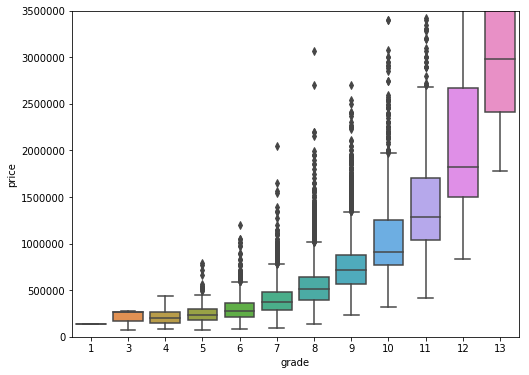

In [13]:
var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000)

(-0.5, 29.5, 0, 3500000)

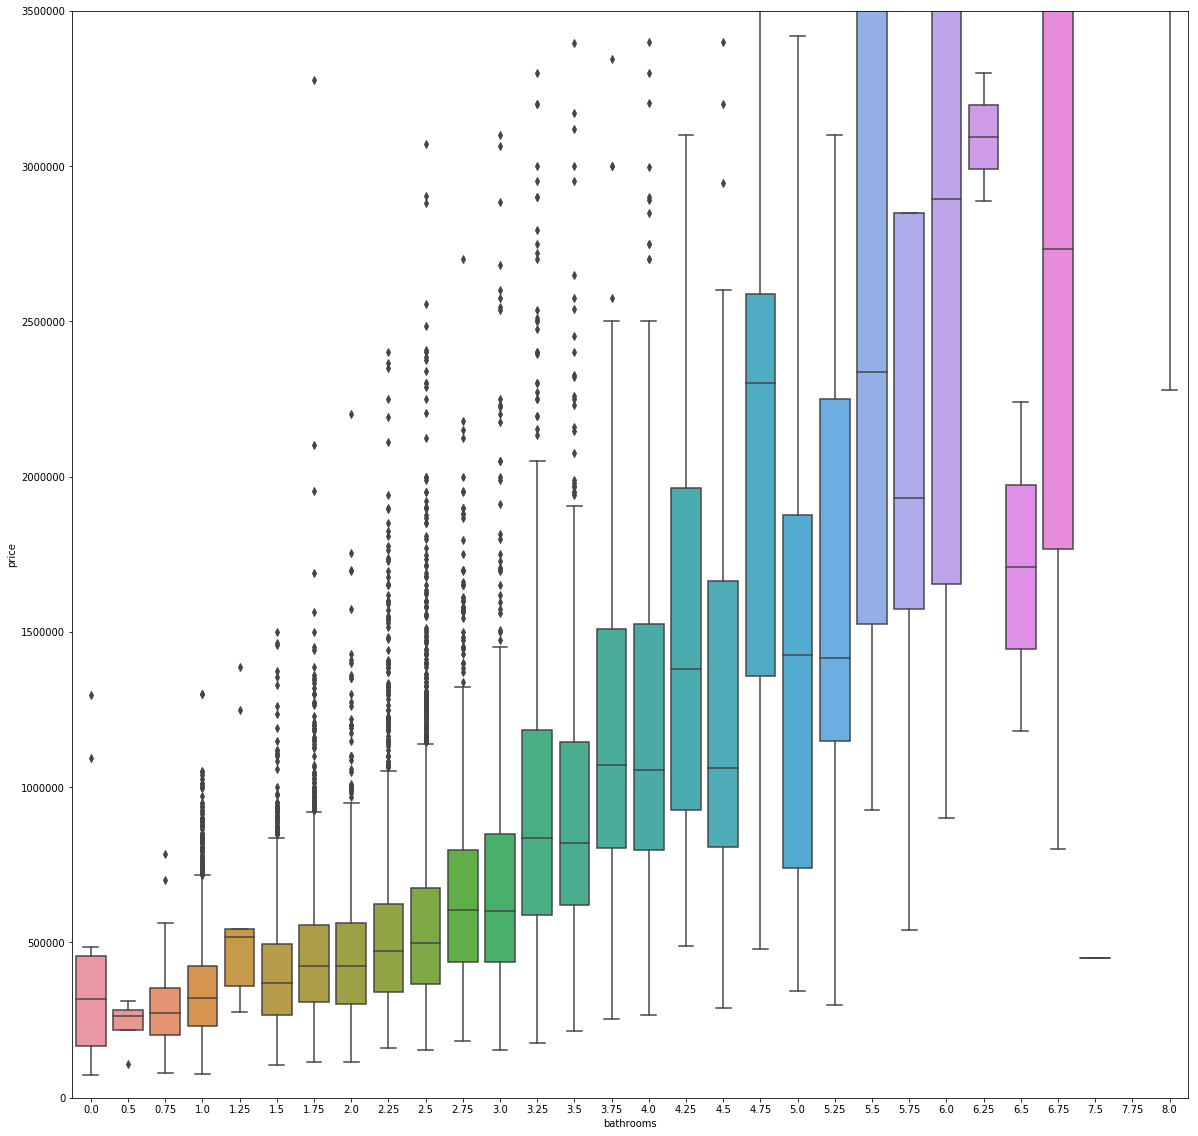

In [14]:
var = 'bathrooms'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000)
#we can understand that as the features "bathrooms", "grade", "bedrooms" increase, so does the price.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 <a list of 116 Text xticklabel objects>)

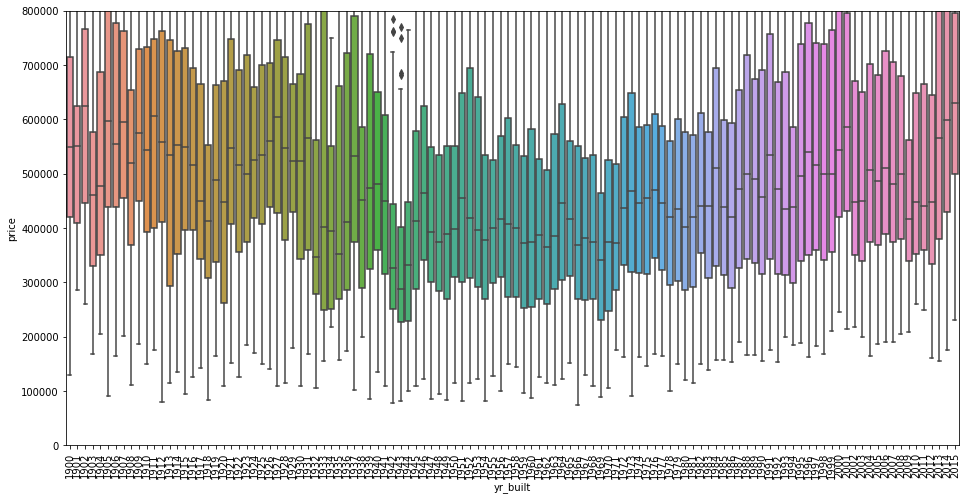

In [15]:
#looking at "yr_built" feature (year the house was built).
var = 'yr_built'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90)
#we might expect a linear relationship with newer houses being significantly more expensive. 
#However, this is not the case, as seen by the graph. 

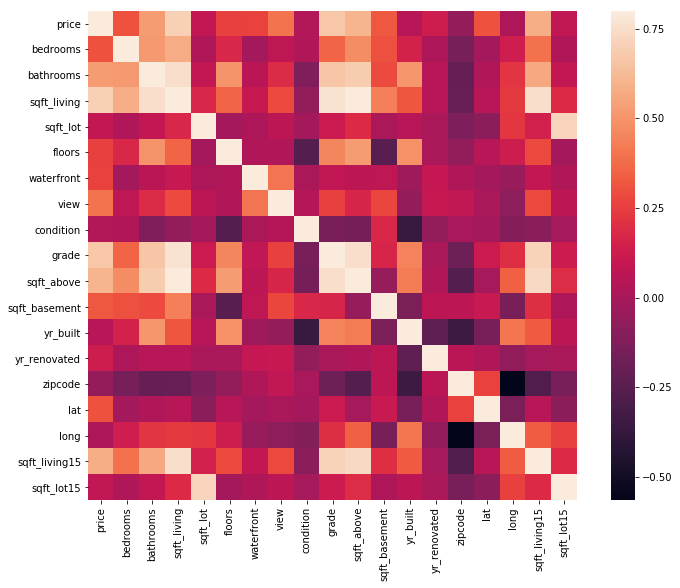

In [16]:
#looking at the heatmap.
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
#we can understan that there are some correlation between variables.

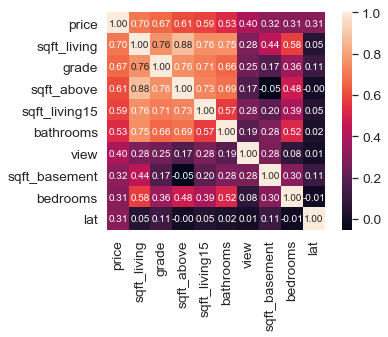

In [17]:
k = 10 #(number of variables for heatmap).
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#the features "sqft_living", "grade", "sqft_above" and "sqft_living" displayed the highest correlation with the price of the house.
#moreover, there is a high correlation of sqft_living with number of bathrooms and grade. This is common sense, as the 
#square feet increase, so does the number of floors and bathrooms.

C:\Users\Almog\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


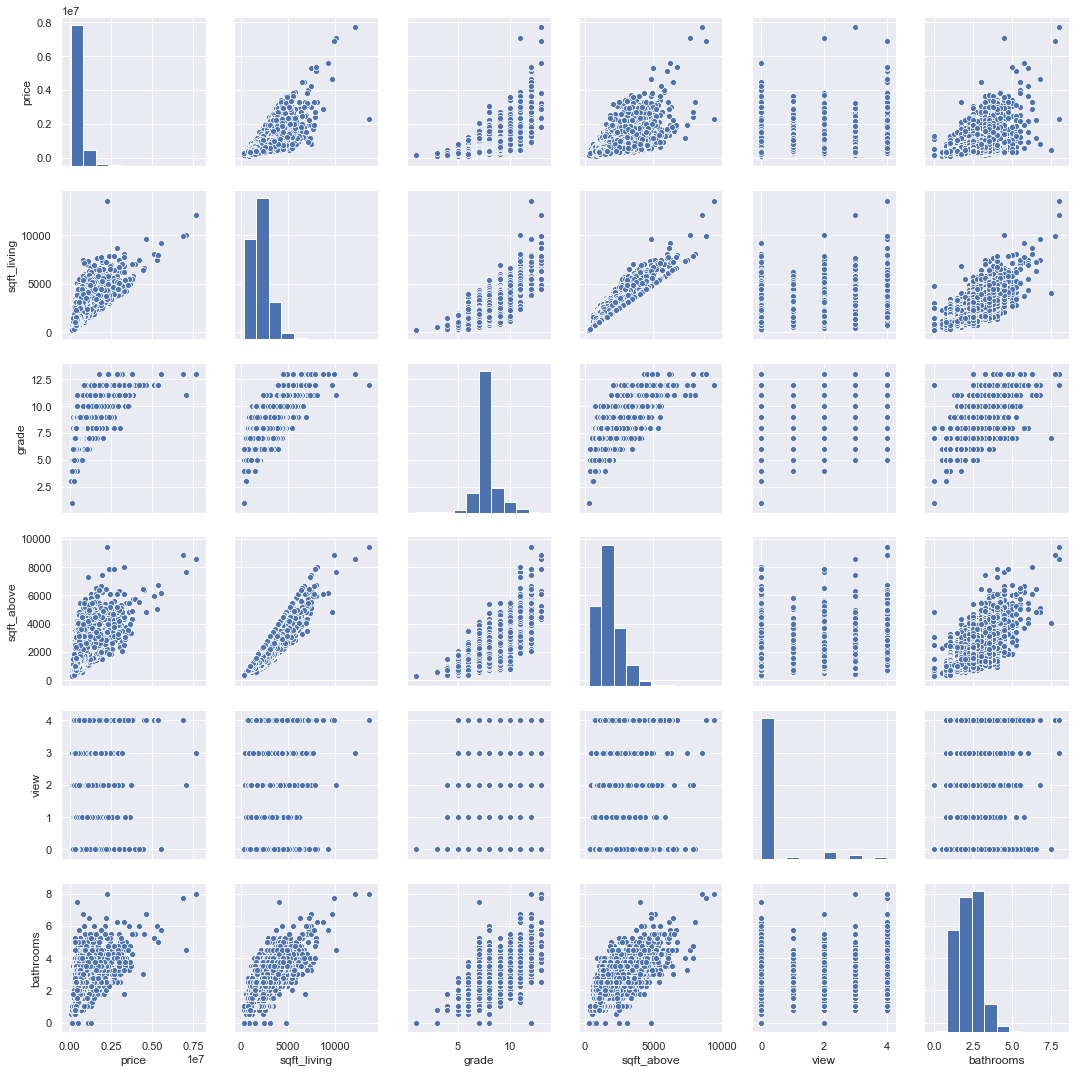

In [18]:
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms']
sns.pairplot(df[cols], size = 2.5)
plt.show();
#these scatterplots confirm the findings of the heatmap. There is linear correlation between sqft_living, sqft_above, bathrooms
#and grade.Moreover, what we learned that the above mentioned features have the biggest impact on sale price.

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

C:\Users\Almog\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [20]:
# linear regression:


# Benefits of linear regression :

# widely used
# runs fast
# easy to use (not a lot of tuning required)
# highly interpretable
# basis for many other methods

In [21]:
# using machin learning using linear regression model
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# predicting based on the test 
y_pred = linreg.predict(x_test)
print (y_pred)

[[638826.30335686]
 [477423.40350233]
 [703003.15129784]
 ...
 [784523.76050111]
 [ 14888.14336354]
 [452765.2993241 ]]


In [23]:
# checking the percentage of success
accuracy = linreg.score(x_test,y_test)
print(accuracy*100,'%')

68.61933092127909 %


In [24]:
# polynomial regression:


# polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y 

# the degree of the polynomial features Default = 2.

# benefits of polynomial regression :
# very accurate


In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# i cahnged the degree and ran and the best results was with degree=4

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X)

In [26]:
# fit the transformed features to Linear Regression
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# predicting based on the training x poly
y_poly_pred = model.predict(x_poly)

In [28]:
# checking the percentage of success 
r2 = r2_score(y,y_poly_pred)
print(r2*100,'%')

88.16047516466236 %
